# 早上場

流程：

1. 安裝套件
2. 爬蟲必備技能:
    1. get
    2. post
    3. 載圖片
3. 實戰：
    1. Gomaji範例
    2. PTT航海王版範例
    3. Cookie觀念講解
    4. PTT 八卦版範例

## 下載今天教材

<https://github.com/UDICatNCHU/PublicTutorial/archive/master.zip>

## 安裝套件

請在bluemix的notebook執行下列指令  
> **`!pip install html5lib==1.0b8 nltk jieba sklearn numpy scipy requests bs4 simplejson pyprind matplotlib `**  
> **`!pip install --upgrade html5lib==1.0b8`**  

若出現錯誤請按一下 **`restart kernel`**

若是使用cmd，請輸入 `pip install -r requirements.txt`  
requirements.txt裏面包含所有今天會用到的函式庫  
透過指令一鍵安裝  

函式庫功能：
* requests：是可以讓python上網，與其他網站進行get、post等協定的套件
* simplejson：讓python能處理json的套件
* bs4：能夠解析網頁html的套件
* pyprind：出現進度調特效
* nltk, sklearn, numpy, scipy：文字分類器、科學計算、機器學習





# 必備技能
## Get
就像是寄明信片，把你要查詢的資訊都寫在外面  
沒有資安疑慮、重視速度會選用 **get**
 
ex：google查詢  
通常?後面的字串就是要查詢的東西  

![img](https://s3.amazonaws.com/media-p.slid.es/uploads/545711/images/2854314/9957A3BD-C870-4225-9273-F22555EC5049.jpg)

下面範例：爬取 [中興大學google搜尋結果](http://www.google.com.tw/search?q=中興大學&oq=中興大學&aqs=chrome..69i57j69i61l3j69i65l2.176j0j7&sourceid=chrome&ie=UTF-8) 的資料

In [1]:
import requests
# 裏面可以放任意的網址
re = requests.get("http://www.cs.nchu.edu.tw/v4/") 

# 取得網站正確的編碼避免出現亂碼
re.encoding = re.apparent_encoding
print(re.text)

## Post
像提交的訊息放在信封裏面，除非偷看封包不然沒辦法知道你傳了什麼資訊  
有資安疑慮，例如登入系統等，請使用 **post**

![img](http://img.tulaoshi.com/image/20160217/00c80903e1d63b753d3f84bd0c1538a8.jpg)
下列範例: 爬取 [中興學校的課程查詢網](https://onepiece.nchu.edu.tw/cofsys/plsql/crseqry_home) 資工系的課程


## requests.post 裏面的data怎知要打什麼?

先按開F12再執行中興的課程查詢  
然後按到Network的地方  
下面選單選項選擇第一個：crseqry_home  
拉到最下面看到的Form Data  
把Form Data的資料轉換成dict的型態  
此資料即是requests.post裏面的data
> {
>   'v_career' : 'U'
>    ...
> }


In [2]:
import requests
re = requests.post("https://onepiece.nchu.edu.tw/cofsys/plsql/crseqry_home",
data={'v_career':'U','v_dept':'U56','v_level':'2'})
# data這個參數裏面放的是我們提交表單的參數
# U代表是大學部
# U56是資工系代號
# 2代表是二年級

print(re.text) 
# 這樣就可以看到該網頁的html

# 必備技能2
## 下載圖片
範例網站:
[gomaji](http://www.gomaji.com/index.php?city=Taichung&tag_id=101)  


下載圖片範例：

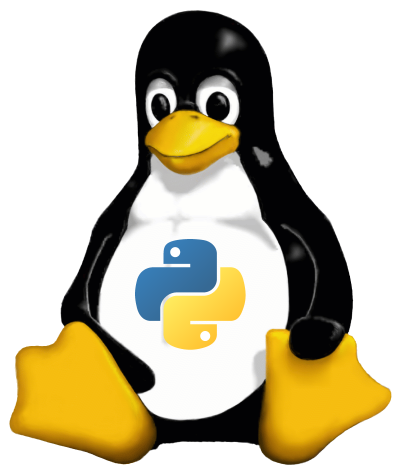

In [12]:
import shutil

# stream=True，用串流的方式下載
img = requests.get('http://www.pixelbeat.org/talks/linux_and_python/tux-python.png', stream=True)

# with是python開關檔案的語法
# 因為要存圖片所以要用2進制的方式
# img是request的物件，raw會用2進制顯示結果
with open('xxx.jpg', 'wb') as f:
    shutil.copyfileobj(img.raw, f)

print(img.raw)

# 這2行是jupyter的指令，所以才能顯示圖片！！！ 你在cmd打是沒用的
from IPython.display import Image 
Image(filename='xxx.jpg')

### 包成函式來呼叫吧

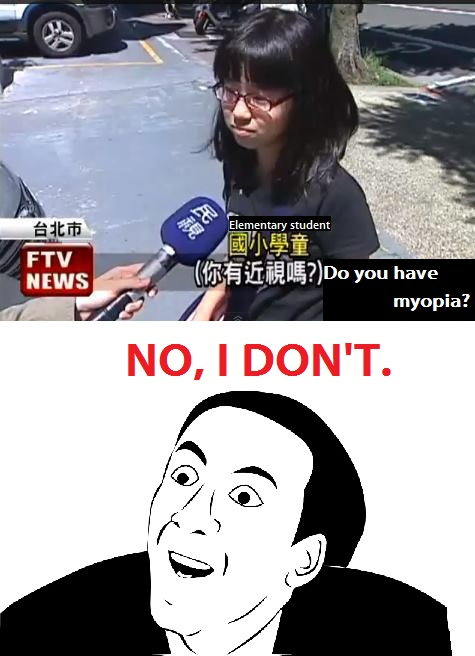

In [13]:
import requests, shutil

def savePict(url, name):
    img = requests.get(url,stream=True)
    with open(name+'.jpg', 'wb') as f:
        shutil.copyfileobj(img.raw, f)
savePict("http://i2.disp.cc/imgur7/146Qf.jpg", "檔名")

from IPython.display import Image 
Image(filename='檔名.jpg')

## 範例：把餐廳跟餐點爬下來
範例網站：[gomaji](http://www.gomaji.com/index.php?city=Taichung&tag_id=28)

把要抓的網頁內容丟進beautifulSoup建構式裡面  
res.text就是顯示網頁的內容  

In [17]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://www.gomaji.com/index.php?city=Taichung&tag_id=28')
soup = BeautifulSoup(res.text)

# select用法
# 指定css選取器的語法
# select 回傳list 也就是array
# soup.select('ul or h1 or img or a ...各式各樣的css選取器的語法'):
soup.select('.proname_3')

[<h3 class="proname_3">A.水Q手提禮盒一盒 / B.熊愛你禮盒一盒</h3>,
 <h3 class="proname_3">2017戀人限定蛋糕</h3>,
 <h3 class="proname_3">平假日皆可抵用1000元消費金額</h3>,
 <h3 class="proname_3">A.原味鳳梨酥禮盒一盒 / B.巧克力鳳梨酥禮盒一盒 / C.繽紛葛蕾特禮盒一盒 / D.璀璨奶油卷禮盒一盒</h3>,
 <h3 class="proname_3">A.月之曉夢中秋禮盒一盒 / B.月之曉夢中秋禮盒三盒 / C.月之曉夢中秋禮盒十盒 / D.月之晶瑩A中秋禮盒一盒...</h3>,
 <h3 class="proname_3">A.綜合鳳黃酥(九入)一盒 / B.綜合鳳黃酥(九入)三盒 / C.綜合鳳黃酥(九入)十盒 / D.正隆之月一盒 /...</h3>,
 <h3 class="proname_3">御品奶皇月餅禮盒一盒+原木桶豆花券一張</h3>,
 <h3 class="proname_3">A.巧克力天使蛋糕一入 / B.白雪黑森林蛋糕捲一入 / C.皇家牛奶米千層蛋糕一入</h3>,
 <h3 class="proname_3">夏季新品覓蜜蜂蜜蛋糕 A.單盒組 / B.三盒組 / C.六盒組</h3>,
 <h3 class="proname_3">2017限定-帥氣papa節限定蛋糕 A.6吋蛋糕五選一 / B.8吋蛋糕五選一 / C.8吋蛋糕棋藝papa一個 ...</h3>,
 <h3 class="proname_3">小樽燒伴手禮</h3>,
 <h3 class="proname_3">黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)</h3>,
 <h3 class="proname_3">平假日皆可抵用600元消費金額</h3>]

什麼是css選取器  
網頁裏面有太多元件  
需要一種語法讓我們可以定位到那些元件  
對那些東西進行操作  
[參考網址](http://www.j4.com.tw/web-design/css-%E9%81%B8%E6%93%87%E5%99%A8%E3%80%81%E9%81%B8%E5%8F%96%E5%99%A8%EF%BC%88selector%EF%BC%89%E7%A8%AE%E9%A1%9E%E7%B0%A1%E4%BB%8B/)

學css選取器有點麻煩  
所以這堂課不會介紹  
直接使用工具來輔助我們
![img](http://i.imgur.com/VnjnW7S.jpg)

## 安裝Chrome插件 infolite  

[下載網址](https://chrome.google.com/webstore/detail/infolite/ipjbadabbpedegielkhgpiekdlmfpgal)  

[使用說明](http://tech-marsw.logdown.com/blog/2016/01/10/crawler-tips-mining-chrome)

示範 滑鼠移過去就會顯示CSS選取器  
直接將css選取器的值  
複製貼上到**soup.select()**當中
![示範](http://user-image.logdown.io/user/411/blog/411/post/419937/ydTt52rqQiOtBhtpqUYX_%E8%9E%A2%E5%B9%95%E5%BF%AB%E7%85%A7%202016-01-10%20%E4%B8%8B%E5%8D%8812.53.48.png)

範例：顯示Gomaji商品名稱

In [21]:
import requests
from bs4 import BeautifulSoup
def parsePage(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text)

    for i in soup.select('.proname_3'):
        print(i.text + '\n')
        
parsePage('http://www.gomaji.com/index.php?city=Taichung&tag_id=28')

A.水Q手提禮盒一盒 / B.熊愛你禮盒一盒

2017戀人限定蛋糕

平假日皆可抵用1000元消費金額

A.原味鳳梨酥禮盒一盒 / B.巧克力鳳梨酥禮盒一盒 / C.繽紛葛蕾特禮盒一盒 / D.璀璨奶油卷禮盒一盒

A.月之曉夢中秋禮盒一盒 / B.月之曉夢中秋禮盒三盒 / C.月之曉夢中秋禮盒十盒 / D.月之晶瑩A中秋禮盒一盒...

A.綜合鳳黃酥(九入)一盒 / B.綜合鳳黃酥(九入)三盒 / C.綜合鳳黃酥(九入)十盒 / D.正隆之月一盒 /...

御品奶皇月餅禮盒一盒+原木桶豆花券一張

A.巧克力天使蛋糕一入 / B.白雪黑森林蛋糕捲一入 / C.皇家牛奶米千層蛋糕一入

夏季新品覓蜜蜂蜜蛋糕 A.單盒組 / B.三盒組 / C.六盒組

2017限定-帥氣papa節限定蛋糕 A.6吋蛋糕五選一 / B.8吋蛋糕五選一 / C.8吋蛋糕棋藝papa一個 ...

小樽燒伴手禮

黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)

平假日皆可抵用600元消費金額



把爬蟲的結果存成json  
需要用到json這個函式庫

In [18]:
import requests, json
from bs4 import BeautifulSoup

res = requests.get('http://www.gomaji.com/index.php?city=Taichung&tag_id=28')
soup = BeautifulSoup(res.text)

tmp = []
for i in soup.select('.proname_3'):
    tmp.append({'product':i.text})

json.dump(tmp, open('demo.json', 'w'))

# 顯示一下抓下來的json檔
with open('demo.json', 'r', encoding='UTF-8') as f:
    print(json.load(f))

[{'product': '黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)'}, {'product': 'A.水Q手提禮盒一盒 / B.熊愛你禮盒一盒'}, {'product': '2017戀人限定蛋糕'}, {'product': '平假日皆可抵用1000元消費金額'}, {'product': 'A.原味鳳梨酥禮盒一盒 / B.巧克力鳳梨酥禮盒一盒 / C.繽紛葛蕾特禮盒一盒 / D.璀璨奶油卷禮盒一盒'}, {'product': 'A.月之曉夢中秋禮盒一盒 / B.月之曉夢中秋禮盒三盒 / C.月之曉夢中秋禮盒十盒 / D.月之晶瑩A中秋禮盒一盒...'}, {'product': 'A.綜合鳳黃酥(九入)一盒 / B.綜合鳳黃酥(九入)三盒 / C.綜合鳳黃酥(九入)十盒 / D.正隆之月一盒 /...'}, {'product': '御品奶皇月餅禮盒一盒+原木桶豆花券一張'}, {'product': 'A.巧克力天使蛋糕一入 / B.白雪黑森林蛋糕捲一入 / C.皇家牛奶米千層蛋糕一入'}, {'product': '夏季新品覓蜜蜂蜜蛋糕 A.單盒組 / B.三盒組 / C.六盒組'}, {'product': '2017限定-帥氣papa節限定蛋糕 A.6吋蛋糕五選一 / B.8吋蛋糕五選一 / C.8吋蛋糕棋藝papa一個 ...'}, {'product': '小樽燒伴手禮'}, {'product': '黑羽土雞精煉萃取大容量原味滴雞精禮盒一盒(150ml x 10包)'}, {'product': '平假日皆可抵用600元消費金額'}]


## PTT爬蟲實戰

爬航海王版從1300~1304頁  
結合進度條，顯示完成進度 

In [35]:
import requests, json, pyprind
from bs4 import BeautifulSoup

for i in pyprind.prog_bar(range(1290, 1305-1), track_time=False):
    res = requests.get('https://www.ptt.cc/bbs/ONE_PIECE/index{}.html'.format(i))
    soup = BeautifulSoup(res.text)
    #print(soup.select('.title a'))
    

0%          100%
[##############]


儲存成json格式：

In [4]:
import requests, json, pyprind
from bs4 import BeautifulSoup

data = []
for i in pyprind.prog_bar(range(1290, 1305-1), track_time=False):
    res = requests.get('https://www.ptt.cc/bbs/ONE_PIECE/index{}.html'.format(i))
    soup = BeautifulSoup(res.text)
    
    for j in soup.select('.title a'):
        data.append({'title':j.text, 'url':'https://www.ptt.cc' + j['href']})

# print(data)

c:\users\udic\documents\htdocs\publictutorial\venv\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file c:\users\udic\appdata\local\programs\python\python35\Lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
0% [##############] 100%


# 今天的目標：PTT八卦版的情緒分類器

所以當然要用爬蟲去爬八卦版  
航海王版跟八卦版有什麼不一樣嘛?

In [5]:
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html')
print(res.text)

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.22/bbs-print.css" media="print">




	</head>
    <body>
		
<div class="bbs-screen bbs-content">
    <div class="over18-notice">
        <p>本網站已依網站內容分級規定處理</p>

        <p>警告︰您即將進入之看板內容需滿十八歲方可瀏覽。</p>

        <p>若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。</p>
    </div>
</div>

<div class="bbs-screen bbs-content center clear">
    <form action="/ask/over18"

![img](http://pic.pimg.tw/bshadow/1429897640-4241887945_n.png?v=1429897644)

要跟電腦說我們已經滿十八歲了  
請在request上面加個cookie  

### cookie???

![img](https://blueprintinteractive.com/sites/default/files/images/cookie-monster.jpg)

早餐的大媽，可以輕鬆記住客人的臉
![img](http://static.ettoday.net/images/90/d90723.jpg)

但是客人比較多的店會記不住，所以需要發個號碼牌
![img](http://img.appledaily.com.tw/images/ReNews/20150105/640_12a6eb4b9763decad4004123c467e7a8.jpg)

### 網頁也是如此
網頁如果需要知道他是在跟誰通訊  
為了記住他的客戶 就會需要發號碼牌  
號碼牌就是**cookie**

![img](http://odf594a9x.bkt.clouddn.com/cookie-session-0.png)

> 程式碼這樣寫即可
> res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies={'over18': '1'})

In [11]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies={'over18': '1'})
soup = BeautifulSoup(res.text)
data = []
for j in soup.select('.title a'):
    
    data.append({'title':j.text, 'url':'https://www.ptt.cc' + j['href']})

print(data)

[{'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025344.A.F1C.html', 'title': 'Re: [新聞] 陳金德拒辭 稱要改造中油'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025393.A.06D.html', 'title': 'Re: [新聞] 徐國勇：15%備轉容量是誤解法令'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025434.A.DCC.html', 'title': 'Re: [新聞] 總統府憲兵遭持刀攻擊 濺血送醫'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025442.A.499.html', 'title': '[新聞] 基本工資勞方喊27K 資方：大學畢業生都沒'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025454.A.F33.html', 'title': '[新聞] 中油調查小組查什麼？ 高層：這實在太巧'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025468.A.7C9.html', 'title': '[新聞] 中油 下月不再和巨路續約'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025485.A.147.html', 'title': '[爆卦] 世大運首戰中華隊4比17敗給南韓'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025497.A.F32.html', 'title': '[問卦] 為何各國政府能容忍黑道的存在？'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025509.A.737.html', 'title': 'Re: [新聞] 跳電成擁核助力？苗博雅：誰敢保證核能絕'}, {'url': 'https://www.ptt.cc/bbs/Gossiping/M.1503025513.

## 實作時間

請將八卦版最新的兩頁，整理成下方要求的格式  
注意 兩頁就好，爬太多大家網路會爆炸!!!
注意 兩頁就好，爬太多大家網路會爆炸!!!
注意 兩頁就好，爬太多大家網路會爆炸!!!

1. 簡單版: 示範網址 <https://www.ptt.cc/bbs/Gossiping/M.1504258645.A.AF3.html>

```
[
  {
    "text": "作者bond30422 (Bond)看板Gossiping標題[爆卦] 詹詠然打完世大運有可能的班機時間Fri Sep  1 17:37:23 2017
    先講結論
    8/29 17:00 混雙冠軍賽
    8/29 19:10 長榮班機直飛 打混雙冠軍不可能搭上 買這班就是預謀不打
    8/30 19:10 長榮班機直飛 美網會遲到 買這班辛吉絲森77
    8/29 23:35 華航班機轉機 免強可以搭上 免強來得及到美網 但買這班長榮會森77
    8/30 23:00 美網雙打 (美國時間8/30 11:00)
    解釋一下
    8/29 17:00 混雙冠軍賽
    8/30 23:00 美網雙打 (美國時間8/30 11:00)
    長榮8/29晚上飛紐約是19:10
    最晚18:30要check in 打再快也不可能搭上
    如果先買這班機票就表示從頭到尾都不想打混雙冠軍賽
    下一班長榮飛紐約是8/30 19:10
    美網雙打預計是在8/30 23:00開始(紐約時間8/30 11:00)
    只有這班 唯一這班趕得上 非常趕 可能來不及練球 時差問題 隊友會樵死你
    而且詹詠然是長榮代言人 去買華航?
    網址: https://www.ptt.cc/bbs/Gossiping/M.1504258645.A.AF3.html
    ",
    "url": "https://www.ptt.cc/bbs/Gossiping/M.1504258645.A.AF3.html",
    "title": "[爆卦] 詹詠然打完世大運有可能的班機"
  }
]
```

2. 下午需要的版本  目標格式 
    * 示範網址 <https://www.ptt.cc/bbs/Gossiping/index25293.html>
    


```
['你不是已經是板主了嗎？', '幹', '為什麼都是這些老人一直想回鍋啊zzzzzzzzzzz', '怎麼選就這幾個再輪' ... ]
```